In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/20-newsgroups/misc.forsale.txt
/kaggle/input/20-newsgroups/rec.autos.txt
/kaggle/input/20-newsgroups/list.csv
/kaggle/input/20-newsgroups/comp.os.ms-windows.misc.txt
/kaggle/input/20-newsgroups/sci.electronics.txt
/kaggle/input/20-newsgroups/comp.sys.mac.hardware.txt
/kaggle/input/20-newsgroups/talk.politics.mideast.txt
/kaggle/input/20-newsgroups/talk.politics.guns.txt
/kaggle/input/20-newsgroups/talk.religion.misc.txt
/kaggle/input/20-newsgroups/comp.graphics.txt
/kaggle/input/20-newsgroups/soc.religion.christian.txt
/kaggle/input/20-newsgroups/rec.sport.hockey.txt
/kaggle/input/20-newsgroups/rec.sport.baseball.txt
/kaggle/input/20-newsgroups/comp.windows.x.txt
/kaggle/input/20-newsgroups/comp.sys.ibm.pc.hardware.txt
/kaggle/input/20-newsgroups/rec.motorcycles.txt
/kaggle/input/20-newsgroups/sci.med.txt
/kaggle/input/20-newsgroups/sci.space.txt
/kaggle/input/20-newsgroups/alt.atheism.txt
/kaggle/input/20-newsgroups/sci.crypt.txt
/kaggle/input/20-newsgroups/talk.politics

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [8]:
file_path = "/kaggle/input/20-newsgroups/alt.atheism.txt"
with open(file_path, "r", errors="replace") as f:
    docs = f.read().split("\n\n")
print("Total documents:", len(docs))


Total documents: 22360


In [9]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
X_tfidf = vectorizer.fit_transform(docs)

print("Shape of raw TF-IDF matrix:", X_tfidf.shape)

Shape of raw TF-IDF matrix: (22360, 10000)


In [10]:
svd = TruncatedSVD(n_components=2, random_state=42)
X_svd = svd.fit_transform(X_tfidf)

print("Shape after SVD:", X_svd.shape)

Shape after SVD: (22360, 2)


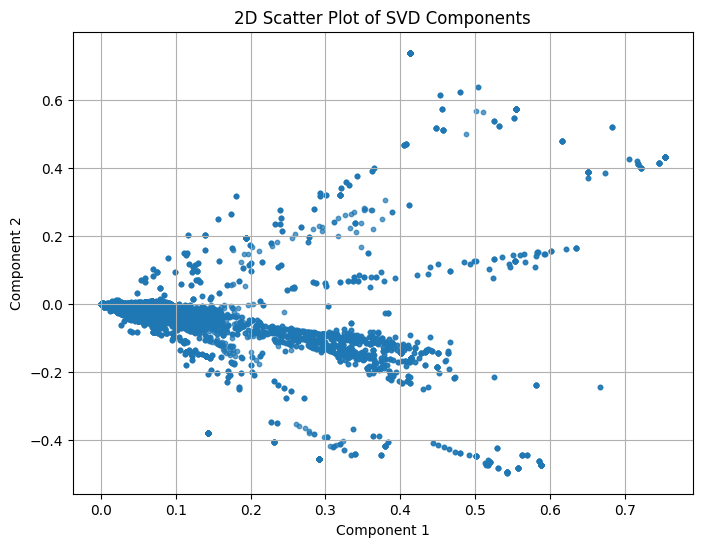

In [12]:
#Visualize top 2 components
plt.figure(figsize=(8, 6))
plt.scatter(X_svd[:, 0], X_svd[:, 1], alpha=0.7, s=10)
plt.title("2D Scatter Plot of SVD Components")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()

In [14]:
#Optional: Clustering with 20 clusters
kmeans = KMeans(n_clusters=20, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_tfidf)

sil_score = silhouette_score(X_tfidf, kmeans_labels)
print("Silhouette Score for KMeans (20 clusters):", sil_score)

Silhouette Score for KMeans (20 clusters): 0.05208064904490995


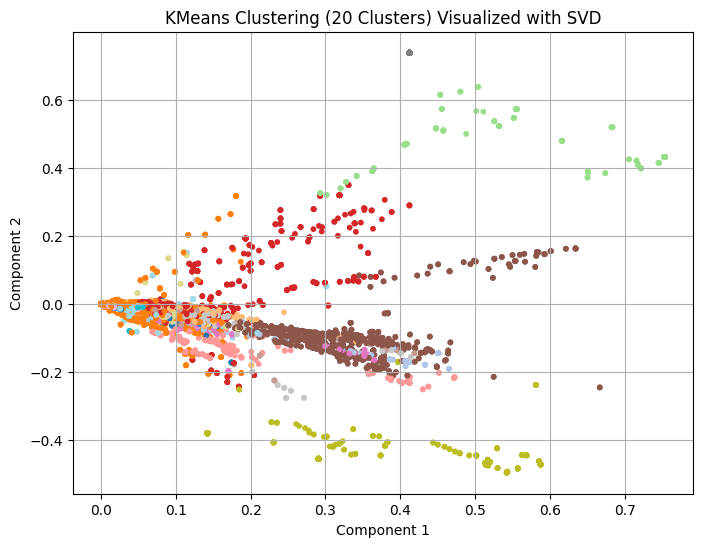

In [15]:
# Optional: Plot clusters in reduced SVD space
plt.figure(figsize=(8, 6))
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=kmeans_labels, cmap='tab20', s=10)
plt.title("KMeans Clustering (20 Clusters) Visualized with SVD")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()


Explanation:
o    A brief explanation (3–4 lines):

 Q. Why dimensionality reduction is used (mention sparsity of TF-IDF)
     Dimensionality reduction is used because TF-IDF creates high-dimensional, sparse data that’s hard to visualize or interpret.

 Q. What SVD/PCA achieves
     SVD reduces this data to a compact form by capturing important patterns.
     This makes it easier to explore the structure of text. 
     
 Q. How clustering helps understand the structure of data without labels
     Clustering then groups similar documents, revealing patterns without using labels.